### 추가 학습자료

- tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras
- **<span style="color:red;">사전 학습된 ConvNet을 이용한 전이 학습</span>** @ https://www.tensorflow.org/tutorials/images/transfer_learning?hl=ko

# 1-1. DNN for Fashion MNIST

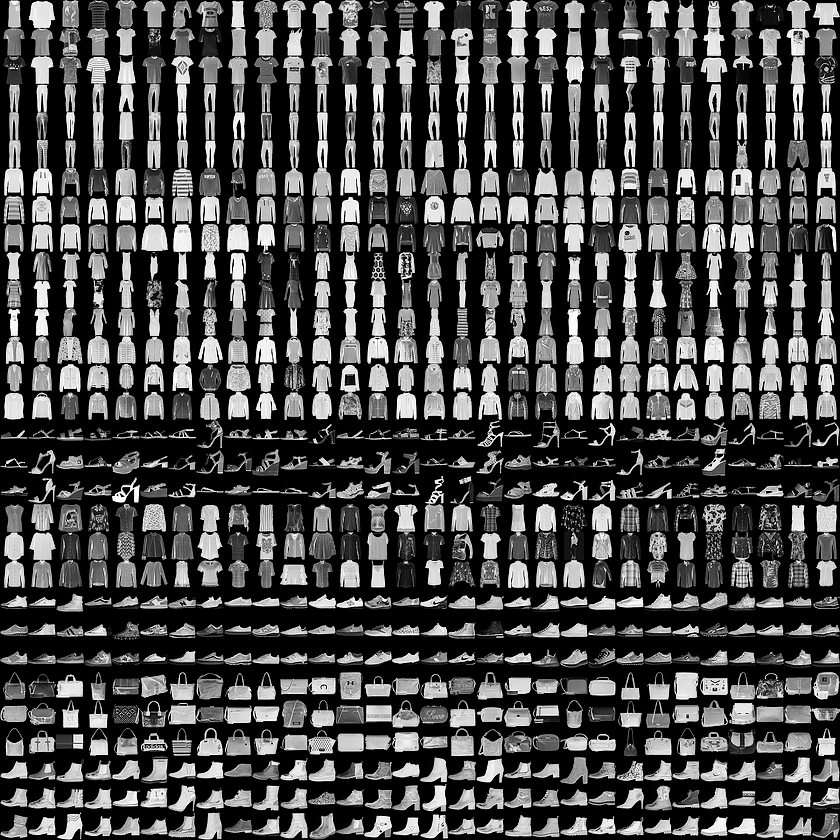
## <center> original dataset @ https://github.com/zalandoresearch/fashion-mnist </center>

### A. Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br>

### B. Prepare the dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

(28, 28)


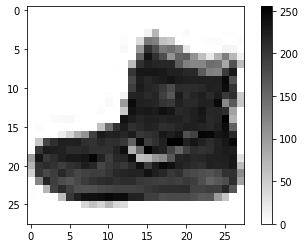

In [3]:
print(train_images[0].shape)

plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

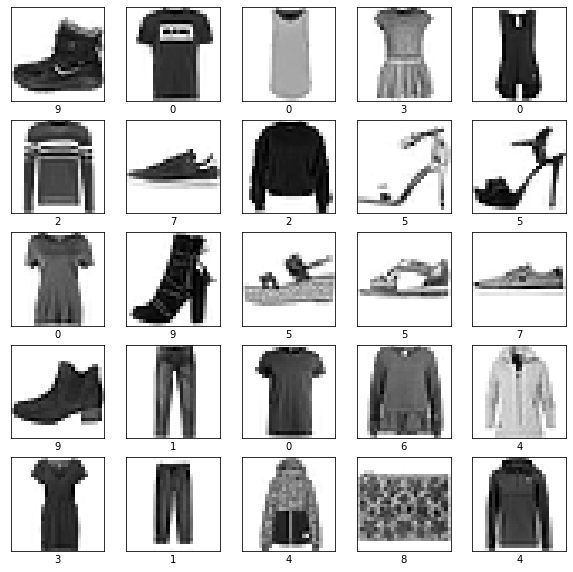

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

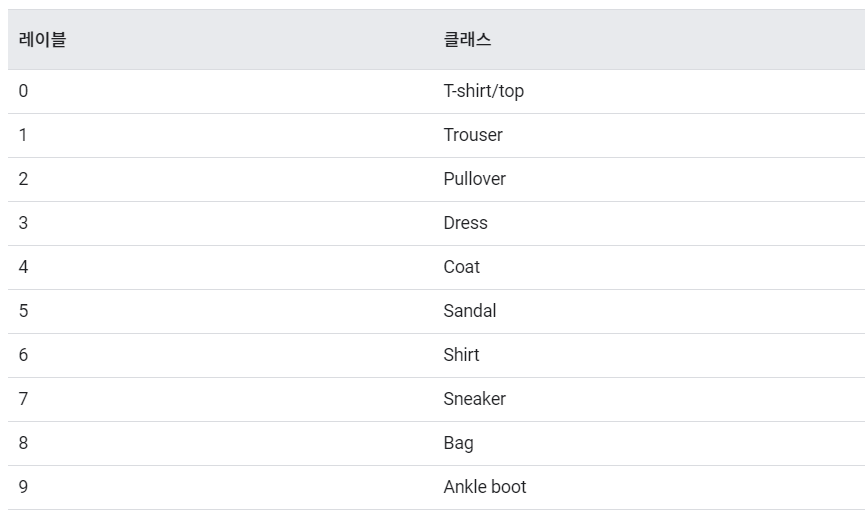

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<br>

### C. Build a model

In [6]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))

In [7]:
train_labels # we should use "Sparse" categorical crossentropy & "Sparse" categorical accuracy

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

<br>

### D. Compile & Train the model

In [8]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.sparse_categorical_crossentropy, 
              metrics=[keras.metrics.sparse_categorical_accuracy])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 8s 5ms/step - loss: 0.5218 - sparse_categorical_accuracy: 0.8168 - val_loss: 0.4038 - val_sparse_categorical_accuracy: 0.8567
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3899 - sparse_categorical_accuracy: 0.8600 - val_loss: 0.3932 - val_sparse_categorical_accuracy: 0.8537
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3490 - sparse_categorical_accuracy: 0.8729 - val_loss: 0.3622 - val_sparse_categorical_accuracy: 0.8703
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3245 - sparse_categorical_accuracy: 0.8805 - val_loss: 0.3484 - val_sparse_categorical_accuracy: 0.8737
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3061 - sparse_categorical_accuracy: 0.8866 - val_loss: 0.3458 - val_sparse_categorical_accuracy: 0.8727
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.2879 - spars

<br>

### E. Evaluate the model

In [9]:
result = model.evaluate(test_images, test_labels)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3645 - sparse_categorical_accuracy: 0.8772
loss (cross-entropy) : 0.36446821689605713
test accuracy : 0.8772000074386597


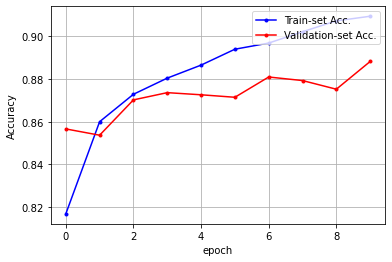

In [10]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

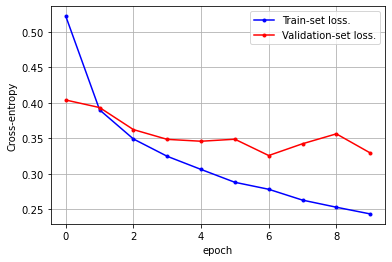

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

In [12]:
# 'Predict' on test data

model.predict(test_images)

array([[2.8543880e-07, 2.0355307e-08, 3.2014824e-09, ..., 1.0788582e-02,
        1.4196098e-06, 9.8705959e-01],
       [1.1144725e-06, 1.6762206e-11, 9.9963295e-01, ..., 1.3483994e-16,
        4.2045306e-10, 1.4736054e-14],
       [1.6753334e-07, 9.9999976e-01, 3.1307821e-11, ..., 5.5766060e-18,
        2.7065776e-12, 2.3692531e-16],
       ...,
       [2.1939017e-04, 3.5721946e-11, 2.4907329e-05, ..., 5.1637139e-09,
        9.9963570e-01, 3.5026829e-10],
       [7.3250156e-08, 9.9996638e-01, 2.8064676e-10, ..., 4.9189573e-11,
        1.0992497e-08, 1.9776909e-10],
       [6.4522251e-06, 3.3798213e-07, 1.7223416e-05, ..., 3.2054731e-03,
        5.1590189e-04, 1.2752114e-04]], dtype=float32)

In [13]:
np.argmax(model.predict(test_images), axis=1)[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0],
      dtype=int64)

In [14]:
test_labels[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0],
      dtype=uint8)

<br>

### F. Visualize the prediction result

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img):
    # predictions_array == 1개 이미지에 대해 예측된 class별 확률값 (after softmax func.) 
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array), # 가장 높은 확률로 예측된 클래스에 대한 확률값
                                         class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [16]:
predictions = model.predict(test_images)

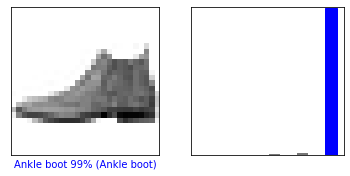

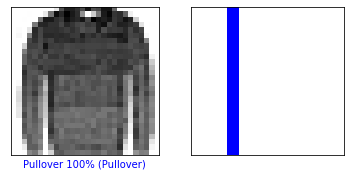

In [17]:
i = 0

plt.figure(figsize=(6, 6))
plt.subplot(2,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(2,2,2)
plot_value_array(i, predictions,  test_labels)

i = 20

plt.figure(figsize=(6, 6))
plt.subplot(2,2,3)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(2,2,4)
plot_value_array(i, predictions,  test_labels)

plt.show()

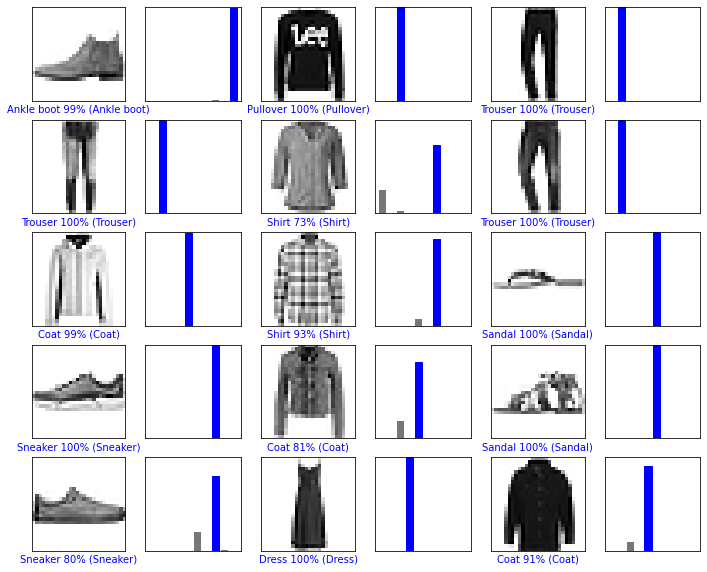

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

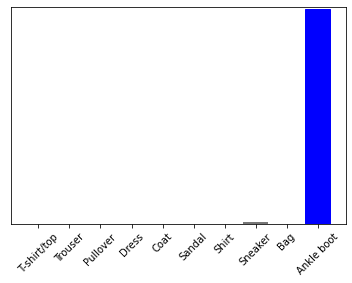

In [19]:
sample_img = test_images[0:1] # 0번 샘플, makes shape as (1, 28, 28) instead of (28, 28)
sample_prediction = model.predict(sample_img)

plot_value_array(0, sample_prediction, test_labels) # 0번 샘플
plt.xticks(range(10), class_names, rotation=45)
plt.show()

<br>
<br>

# 1-2. CNN for Fashion MNIST

**[ CNN 관련 참고자료 ]**

<br>

http://taewan.kim/post/cnn/ (한글 설명) 
<br>

https://poloclub.github.io/cnn-explainer/ (CNN 내부의 구체적인 계산 과정 시각화) 

<br>

https://yceffort.kr/2019/01/29/pytorch-3-convolutional-neural-network (필터 예시) 
<br>

https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1 (필터 예시) 
<br>

https://goo.gl/zsSQ8z (필터 예시) 

<br>

https://blog.exxactcorp.com/lets-learn-the-difference-between-a-deep-learning-cnn-and-rnn/ (필터 적용 예시 on MNIST) 
<br>

https://medium.com/@phidaouss/convolutional-neural-networks-cnn-or-convnets-d7c688b0a207 (필터 적용 시각화)

<br>

https://www.slideshare.net/yongho/ss-79607172 (CNN 개념 이해) 
<br>

https://www.youtube.com/playlist?list=PLl1irxoYh2wzOOU9hvJqMYc215wAlxrpp (CNN 개념 이해)

### A. Import libraries

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, initializers

import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br>

### B. Prepare the dataset

In [21]:
fashion_mnist = datasets.fashion_mnist # fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 이미지 1장의 shape를 (28, 28)에서 (28, 28, 1)로 변경 (채널 차원을 추가)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images / 255.0
test_images = test_images / 255.0

<br>

### C. Build a model

In [22]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu')) # activation=tf.nn.relu
model.add(layers.Dense(10, activation='softmax')) # activation=tf.nn.softmax

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

<br>

### D. Compile & Train the model

In [24]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.sparse_categorical_crossentropy, 
              metrics=[keras.metrics.sparse_categorical_accuracy])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 28s 21ms/step - loss: 0.5531 - sparse_categorical_accuracy: 0.7976 - val_loss: 0.4163 - val_sparse_categorical_accuracy: 0.8473
Epoch 2/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.3516 - sparse_categorical_accuracy: 0.8730 - val_loss: 0.4008 - val_sparse_categorical_accuracy: 0.8503
Epoch 3/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.3010 - sparse_categorical_accuracy: 0.8890 - val_loss: 0.2925 - val_sparse_categorical_accuracy: 0.8897
Epoch 4/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.2666 - sparse_categorical_accuracy: 0.9011 - val_loss: 0.2841 - val_sparse_categorical_accuracy: 0.8975
Epoch 5/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.2390 - sparse_categorical_accuracy: 0.9099 - val_loss: 0.2873 - val_sparse_categorical_accuracy: 0.8966
Epoch 6/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.

<br>

### E. Evaluate the model

In [25]:
result = model.evaluate(test_images, test_labels)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.3274 - sparse_categorical_accuracy: 0.8908
loss (cross-entropy) : 0.32736483216285706
test accuracy : 0.8907999992370605


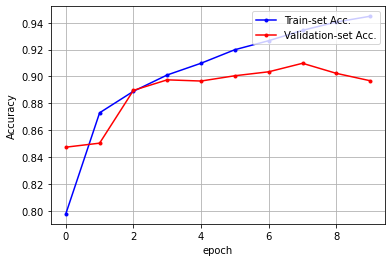

In [26]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

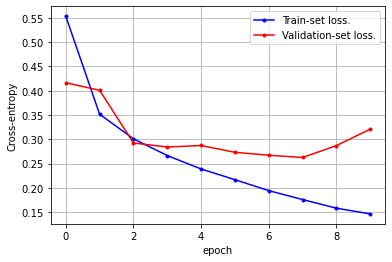

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

<br>
<br>

# 2. CNN for CIFAR-10 

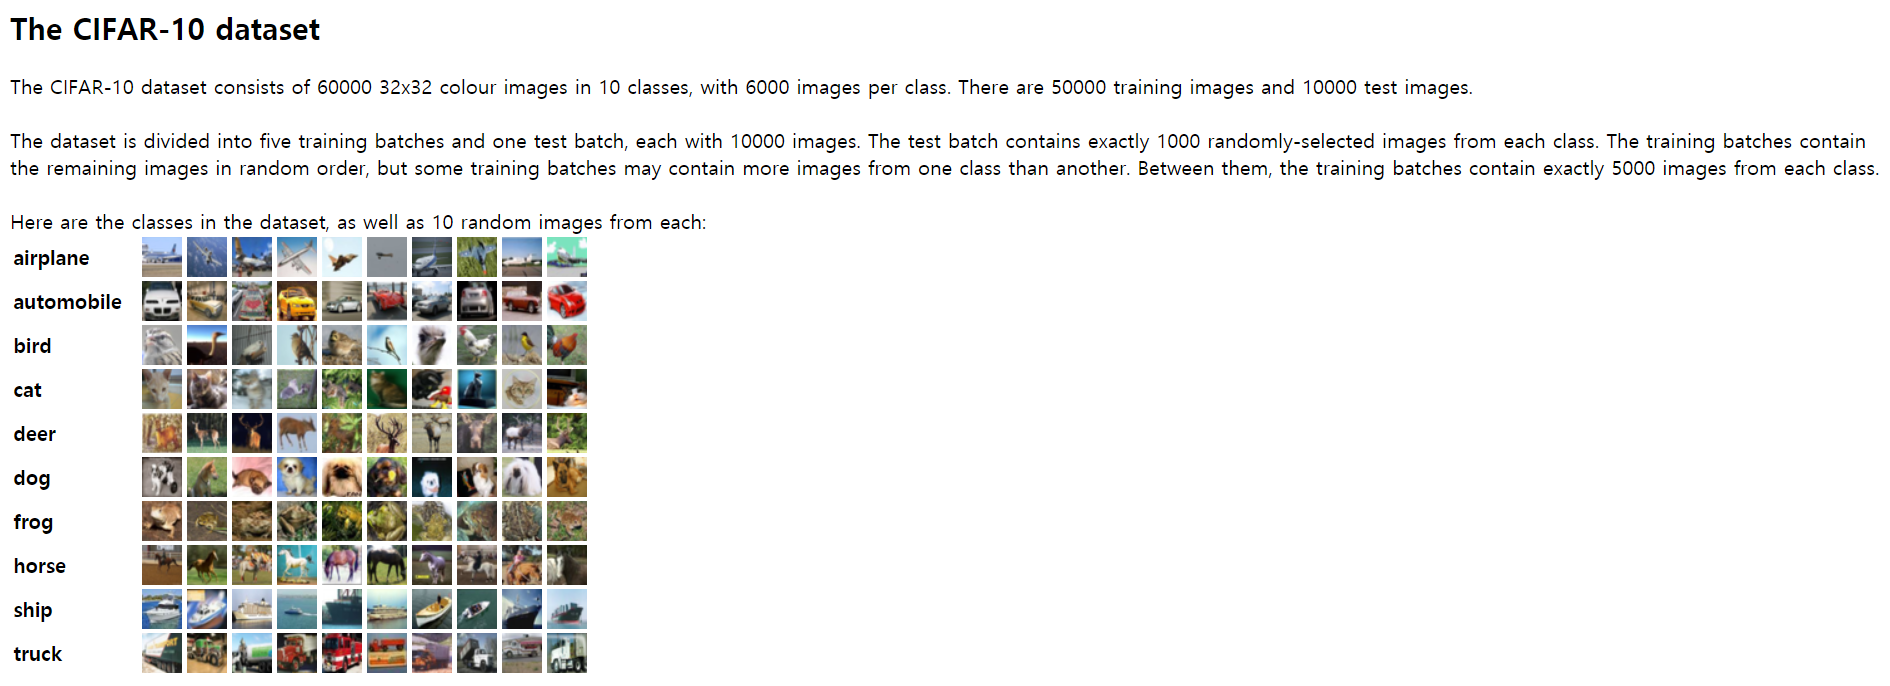

## <center> original dataset @ http://www.cs.toronto.edu/~kriz/cifar.html </center>

### A. Import libraries

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br>

### B. Prepare the dataset

In [29]:
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


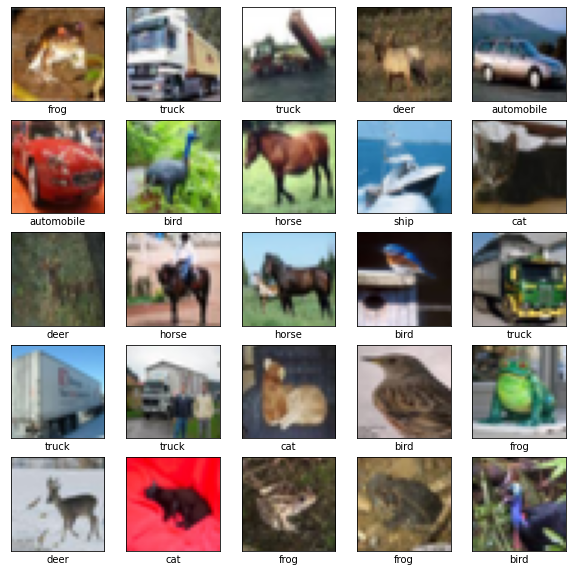

In [30]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [31]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<br>

### C. Build a model

In [32]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu')) # activation=tf.nn.relu
model.add(layers.Dense(10, activation='softmax')) # activation=tf.nn.softmax

In [ ]:
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation=None, kernel_initializer=initializers.he_uniform()))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('elu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation=None, kernel_initializer=initializers.he_uniform()))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('elu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation=None, kernel_initializer=initializers.he_uniform()))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('elu'))
# model.add(layers.Dropout(rate=0.5)) # Dropout-layer

# model.add(layers.Flatten())

# model.add(layers.Dense(64, activation='elu')) 
# model.add(layers.Dense(10, activation='softmax')) 

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

<br>

### D. Compile & Train the model

In [34]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.sparse_categorical_crossentropy, 
              metrics=[keras.metrics.sparse_categorical_accuracy])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 37s 34ms/step - loss: 1.6084 - sparse_categorical_accuracy: 0.4122 - val_loss: 1.3888 - val_sparse_categorical_accuracy: 0.5049
Epoch 2/10
1094/1094 [==============================] - 35s 32ms/step - loss: 1.2362 - sparse_categorical_accuracy: 0.5600 - val_loss: 1.1687 - val_sparse_categorical_accuracy: 0.5863
Epoch 3/10
1094/1094 [==============================] - 44s 40ms/step - loss: 1.0926 - sparse_categorical_accuracy: 0.6128 - val_loss: 1.0759 - val_sparse_categorical_accuracy: 0.6206
Epoch 4/10
1094/1094 [==============================] - 42s 38ms/step - loss: 0.9876 - sparse_categorical_accuracy: 0.6518 - val_loss: 1.0191 - val_sparse_categorical_accuracy: 0.6469
Epoch 5/10
1094/1094 [==============================] - 41s 38ms/step - loss: 0.9083 - sparse_categorical_accuracy: 0.6769 - val_loss: 0.9713 - val_sparse_categorical_accuracy: 0.6571
Epoch 6/10
1094/1094 [==============================] - 44s 40ms/step - loss: 0.

<br>

### E. Evaluate the model

In [35]:
result = model.evaluate(test_images, test_labels)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.9639 - sparse_categorical_accuracy: 0.6793
loss (cross-entropy) : 0.9639118909835815
test accuracy : 0.6793000102043152


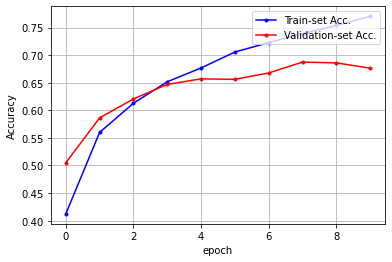

In [36]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

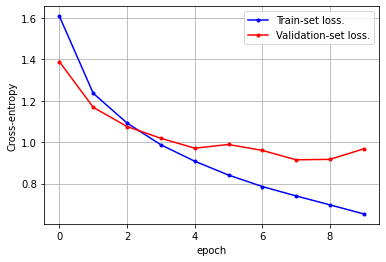

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

In [38]:
def plot_image(i, predictions_array, true_label, img):
    # predictions_array == 1개 이미지에 대해 예측된 class별 확률값 (after softmax func.) 
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array), # 가장 높은 확률로 예측된 클래스에 대한 확률값
                                         class_names[true_label[0]]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

In [39]:
predictions = model.predict(test_images)

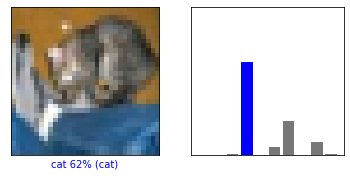

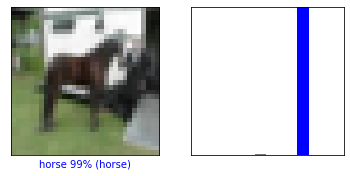

In [40]:
i = 0

plt.figure(figsize=(6, 6))
plt.subplot(2,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(2,2,2)
plot_value_array(i, predictions,  test_labels)

i = 20

plt.figure(figsize=(6, 6))
plt.subplot(2,2,3)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(2,2,4)
plot_value_array(i, predictions,  test_labels)

plt.show()

<br>
<br>

# 3. Transfer learning for CIFAR-10 (using ResNet-50) 

<br>
전이학습을 활용해 약 90% 수준까지 정확도를 높일 수 있습니다.
<p style="color:red;"> 모델 학습에 시간이 무척 많이 소요됩니다. <b>아래 실습은 Google Colab을 활용해주세요!</b> </p>

### A. Import libraries

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br>

### B. Prepare the dataset

In [42]:
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [43]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<br>

### C. Build a model

In [45]:
from tensorflow.keras.applications.resnet50 import ResNet50

conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

In [46]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [47]:
# # 보통 전이학습을 진행할 때는 사전 학습된 모델의 Parameter들은 추가적인 학습을 진행하지 않고 고정시킵니다.
# # 이 실습에서는 기존에 학습된 모델의 Parameter들 역시도 추가적으로 학습을 진행해야 성능이 향상되므로 고정시키지 않습니다. (Fine-tuning)
# # 추후 전이학습을 진행할 때에는 아래 코드를 활용해주세요.

# conv_base.trainable = False
# conv_base.summary() # Trainable params가 0으로 바뀌고 전체 Parameter가 Non-trainable로 세팅됩니다.

In [ ]:
model = models.Sequential()

# There needs to be some pre-processing done beforehand 
# since ResNet50 requires images to have a minimum of 200×200 pixels while the CIFAR-10 dataset has images of 32×32 pixels.
# This can be done by either reshaping the images beforehand 
# or up-scaling to images before we input them into the convolutional layers. 

# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))
# 위 코드 대신 TF에 새로이 추가된 전처리 레이어를 활용할 수 있습니다 (https://www.tensorflow.org/tutorials/images/data_augmentation)
model.add(layers.experimental.preprocessing.Resizing(200, 200)) 

model.add(conv_base) # 사전 학습된 ResNet-50을 통해 Feature를 추출해냅니다.

model.add(layers.Flatten())

model.add(layers.Dense(128, activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

<br>

### D. Compile & Train the model

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=2e-5), 
              loss=keras.losses.sparse_categorical_crossentropy, 
              metrics=[keras.metrics.sparse_categorical_accuracy])

# Colab GPU 기준으로 1.5시간 가량 소요됩니다.
history = model.fit(train_images, train_labels, epochs=5, batch_size=20, validation_split=0.3)

<br>

### E. Evaluate the model

In [ ]:
result = model.evaluate(test_images, test_labels)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])
print()
print(model.summary())

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

x_len = np.arange(len(acc))

plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(acc))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Cross-entropy')
plt.show()

<br>

### F. Save & load the model 

In [ ]:
model.save('transfer_resnet50.h5')
# del model
    
# model = tf.keras.models.load_model('transfer_resnet50.h5')
# predictions = model.predict(test_images)
# print(predictions)